In [ ]:
# %pip install --upgrade pandas

In [ ]:
# %pip install sklearn

In [ ]:
import pandas as pd
#import sweetviz #usado mais pra dados rotulados
import numpy as np
# from sklearn.preprocessing import StandardScaler

In [ ]:
rootPath = "C:\\Users\\mlb\\Teste_VOCs\\DataFiles\\AllDatasets\\"
rootPath2 = "C:\\Users\\mlb\\TSC_Data\\"
columnsName = ["MQ-7","MQ-138","MQ-3","MQ-135","humidity","temperature","pressure","species"]
MinCycle = 85
# columnsName = ["TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","temperature","pressao","humidity"]

In [ ]:
import os
import fnmatch

# Diretório que você quer listar
diretorio = "/content/"

# Listar apenas arquivos .csv
arquivos_csv = [arquivo for arquivo in os.listdir(diretorio) if fnmatch.fnmatch(arquivo, '*.csv')]

# Exibir os nomes dos arquivos .csv
for arquivo in arquivos_csv:
    arquivo = arquivo.replace('\u200b', '')
    print(arquivo)



2_Parapsilosis_02_17_08_2024.csv
2_Parapsilosis_01_17_08_2024.csv
3_Parapsilosis_and_glabrata_01_17_08_2024.csv
6_candida_albicans_2_19_10_2024.csv
4_Cryptococcusneoformas_20_09_2024.csv
1_Glabrata_02_17_08_2024.csv
1_Glabrata_01_17_08_2024.csv
2_Candida_parapsilosis_3_26_09_2024.csv
5_negative_sample_15_10_2024.csv
1_Candida_glabrata_2_12_10_2024.csv
6_candida_albicans_18_10_2024.csv
5_NegativeSample_24_09_2024.csv
2_Candida_parapsilosis2_23_09_2024.csv
3_Parapsilosis_and_glabrata_02_17_08_2024.csv


In [ ]:
#Load albicans file data ,"c_type"
#data dictionary
# Albicans = 1
# Glabrata = 2
# Haemulonii = 3
# Kodamaea_ohmeri = 4
# Krusei = 5
# Parapsilosis = 6
# tropicalis = 7 #não será implementada agora

####################### Bload samples classes #####################################
# Glabrata = 1
# Parapsilosis = 2
# glabra_parapsi = 3
# Cryptococcus = 4
# Negative = 5
# Albicans = 6


In [ ]:
def load_data(dataset_name, species):
    candida_data     = pd.read_csv(dataset_name, delimiter=',', header=None, names=columnsName)
    candida_data     = candida_data.drop(["humidity","temperature","pressure"], axis=1)
#     bacteria_data.dropna(inplace=True)
    candida_data.reset_index(drop=True, inplace=True)
    #---------------------------------------------------
    return candida_data.replace(0, np.nan)

In [ ]:

def extract_cycles(df, cycle_separator):
  cycles = []
  current_cycle = []
  species_value = None # Variável para armazenar o valor da coluna 'species'

  for _, row in df.iterrows():
    if row.iloc[0] == cycle_separator:
      if current_cycle and len(current_cycle) >=MinCycle:
        df_cycle = pd.DataFrame(current_cycle)
        df_cycle.dropna(inplace=True)
        # print(df_cycle)
        # Guardar o valor da coluna species
        species_value = df_cycle['species'].iloc[0]
        # print(df_cycle['species'])
        df_cycle = df_cycle.drop('species', axis=1) # Remove a coluna 'species'
        print(df_cycle)
        for col in df_cycle.columns:
          df_cycle[col] = pd.to_numeric(df_cycle[col], errors='coerce')
          mode_value = df_cycle[col].mode()[0]
          df_cycle[col] = df_cycle[col].apply(lambda x: mode_value if x < 50 else x) #df_cycle[col] = df_cycle[col].replace(0, mode_value)

          # df_cycle[col] = df_cycle[col].replace(0, mode_value)

        # Armazena o valor da coluna 'species' antes de remover


        cycles.append(df_cycle)
      current_cycle = []
    else:
      current_cycle.append(row)

  if current_cycle:
    df_cycle = pd.DataFrame(current_cycle)
    df_cycle.dropna(inplace=True)
    # Armazena o valor da coluna 'species' antes de remover (se ainda não tiver sido armazenado)
    # print(df_cycle.iloc[50:80])
    # Substitui zeros pela moda em cada coluna
    species_value = df_cycle['species'].iloc[0]
    df_cycle = df_cycle.drop('species', axis=1) # Remove a coluna 'species'

    for col in df_cycle.columns:
      # Converte os valores da coluna para numéricos, substituindo valores não numéricos por NaN
      df_cycle[col] = pd.to_numeric(df_cycle[col], errors='coerce')
      # Calcula a moda da coluna, ignorando os NaNs
      mode_value = df_cycle[col].mode()[0]
      # Substitui os valores menores que 50 pela moda
      df_cycle[col] = df_cycle[col].apply(lambda x: mode_value if x < 50 else x) #df_cycle[col] = df_cycle[col].replace(0, mode_value)

        # Armazena o valor da coluna 'species' antes de remover

    cycles.append(df_cycle)

  max_cycle_length = max(len(cycle) for cycle in cycles)
  return cycles, max_cycle_length, species_value



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def plot_cycles(cycles, min_val=0, max_val=2800):
    """
    Plota gráficos de linha para cada ciclo em uma lista de DataFrames.

    Args:
        cycles (list of pd.DataFrame): Lista de DataFrames, onde cada DataFrame representa um ciclo.
        min_val (int): Valor mínimo para o eixo Y.
        max_val (int): Valor máximo para o eixo Y.
    """

    for i, cycle in enumerate(cycles):

      plt.figure(figsize=(15, 7), dpi=300)
      for column in cycle.columns:
          # Converte os valores da coluna para numéricos, substituindo valores não numéricos por NaN
          cycle[column] = pd.to_numeric(cycle[column], errors='coerce')

          # Preenche os NaNs com a moda da coluna
          mode_value = cycle[column].mode()[0]
          cycle[column].fillna(mode_value, inplace=True)

          # Agora todos os valores na coluna são numéricos
          sns.lineplot(data=cycle, x=cycle.index, y=column, label=column)

      plt.title(f"Cycle {i+1}")
      plt.xlabel("Time")
      plt.ylabel("Sensor Value")

      # Ajusta os valores do eixo Y para serem intervalados
      plt.ylim(min_val, max_val)
      plt.yticks(np.arange(min_val, max_val + 1, step=300))  # Ajuste o 'step' conforme necessário

      plt.legend()
      plt.show()

In [ ]:
# método para igualar os dataframes de acordo com um tamanho limite, que será especificado por parâmetro. Esse parÂmetro será utilizado para nivelar o dataframe, tirando tanto valores do início como do fim, de forma porporcional

def equalize_dataframes(cycles, limit_length):
  equalized_cycles = []

  for cycle in cycles:
    cycle_length = len(cycle)

    if cycle_length > limit_length:
      # Calcula quantos elementos remover do início e do fim
      remove_count = cycle_length - limit_length
      remove_start = remove_count // 2
      remove_end = remove_count - remove_start

      # Remove elementos do início e do fim
      equalized_cycle = cycle.iloc[remove_start : cycle_length - remove_end]

    elif cycle_length < limit_length:
      # Calcula quantos elementos duplicar no início e no fim
      duplicate_count = limit_length - cycle_length
      duplicate_start = duplicate_count // 2
      duplicate_end = duplicate_count - duplicate_start

      # Duplica elementos no início e no fim
      start_rows = cycle.iloc[:duplicate_start].copy()
      end_rows = cycle.iloc[-duplicate_end:].copy()
      equalized_cycle = pd.concat([start_rows, cycle, end_rows], ignore_index=True)

    else:
      equalized_cycle = cycle.copy()

    equalized_cycles.append(equalized_cycle)

    # # Verifique o tamanho dos dataframes equalizados
    # for i, cycle in enumerate(equalized_cycles):
    #   print(f"Tamanho do ciclo {i+1} equalizado: {len(cycle)}")
  return equalized_cycles

In [ ]:

def process_cycles(cycles, species_value):
  # Encontra o tamanho do maior ciclo
  max_cycle_length = max(len(cycle) for cycle in cycles)

  # Filtra ciclos menores que o maior ciclo
  filtered_cycles = [cycle for cycle in cycles if len(cycle) == max_cycle_length]

  # Cria um novo DataFrame vazio com as colunas corretas
  num_columns = len(filtered_cycles[0].columns) * max_cycle_length
  new_df = pd.DataFrame(columns=range(num_columns))

  # Itera sobre os ciclos filtrados
  for i, cycle in enumerate(filtered_cycles):
    # Converte o ciclo em uma única linha
    cycle_row = cycle.values.flatten()

    # Adiciona a linha ao novo DataFrame
    new_df.loc[i] = cycle_row
  new_df[f'{len(new_df.columns)}'] = species_value
  return new_df
# ... (código anterior para carregar dados e extrair ciclos)


In [ ]:

def class_mapping(df):
    # Crie um dicionário para mapear as strings para números
    class_mapping = {
        'glabrata': 1.0,
        'parapsilosis': 2.0,
        'parapsilosis_glabrata': 3.0,
        'cryptococus_n': 4.0,
        'negative': 5.0,
        'c_albicans': 6.0
        # Adicione mais classes e mapeamentos conforme necessário
    }

    # Use o método `replace` para substituir as strings pelos números correspondentes
    df[f'{len(df.columns)-1}'] = df[f'{len(df.columns)-1}'].replace(class_mapping)
    return df

In [ ]:
from sklearn.utils import shuffle
def pre_processin_all_data(diretorio, cycle_divisor, limit_length):
    import os
    import fnmatch
    # Diretório que você quer listar
    dataframes  = []
    # Listar apenas arquivos .csv
    arquivos_csv = [arquivo for arquivo in os.listdir(diretorio) if fnmatch.fnmatch(arquivo, '*.csv')]
    # Exibir os nomes dos arquivos .csv
    for arquivo in arquivos_csv:
        # arquivo = arquivo.replace('\u200b', '')
        path = os.path.join(diretorio, arquivo)
        classe = int(arquivo[0]) #pega a classe que representa o arquivo (o primeiro caracter do arquivo deve ser o número da classe)
        print(f"Classe do arquivo {classe}")
        glabrata_1 = load_data(str(path), classe)
        print()
        print(f"Current Path: {path}")
        cycles_gla1, max_length, species_value  = extract_cycles(glabrata_1, cycle_divisor)
        print("Número de ciclos encontrados:", len(cycles_gla1))
        print("Tamanho do maior ciclo:", max_length)
        print("species_value:", species_value)
        # Exemplo de uso:
        equalized_cycles = equalize_dataframes(cycles_gla1, limit_length)

        # # Verifique o tamanho dos dataframes equalizados
        # for i, cycle in enumerate(equalized_cycles):
        #   print(f"Tamanho do ciclo {i+1} equalizado: {len(cycle)}")

        new_df = process_cycles(equalized_cycles,species_value )
        dataframes.append(new_df)
        # combined_df = pd.concat([combined_df, new_df])

    combined_df = pd.concat(dataframes, ignore_index=True)
    combined_df = shuffle(combined_df)
    newDF = class_mapping(combined_df)
    return newDF

#IMPORTANTE: o primeiro caracter do arquivo deve ser o número da classe

diretorio = "/content/"
cycle_divisor = "#### New CycleReads  ####"
limit_length = 128  # Defina o tamanho limite desejado para o ciclo
newDF = pre_processin_all_data(diretorio, cycle_divisor, limit_length)

Classe do arquivo 2

Current Path: /content/2_Parapsilosis​_02​_17_08_2024.csv
        MQ-7  MQ-138    MQ-3  MQ-135
1   1470e+00  1007.0   910.6   607.3
2   1469e+00  1006.0   911.2   606.9
3   1470e+00  1006.0   910.4   606.7
4   1472e+00  1004.0   898.1   580.5
5   1478e+00  1008.0   904.8   568.8
..       ...     ...     ...     ...
79  1547e+00  1052.0  1296.0   605.7
80  1547e+00  1052.0  1296.0   605.5
81  1546e+00  1052.0  1298.0   606.3
82  1546e+00  1051.0  1299.0   605.9
83  1546e+00  1052.0  1300.0   604.9

[83 rows x 4 columns]
         MQ-7  MQ-138    MQ-3  MQ-135
86   1546e+00  1052.0  1302.0   605.7
87      6e+00  1051.0  1303.0   605.9
88   1510e+00  1042.0  1134.0   600.4
89   1515e+00  1041.0  1173.0   616.5
90   1514e+00  1040.0  1175.0   617.5
..        ...     ...     ...     ...
253  1552e+00  1054.0  1389.0   607.7
254  1552e+00  1054.0  1390.0   608.1
255  1552e+00  1055.0  1390.0   608.1
256  1552e+00  1055.0  1390.0   607.9
257  1551e+00  1053.0  1390.0   608.

<ipython-input-13-18ac9d252bc0>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f'{len(df.columns)-1}'] = df[f'{len(df.columns)-1}'].replace(class_mapping)


In [ ]:
newDF

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
272,1523.0,1009.0,1289.0,603.6,1524.0,1010.0,1291.0,603.8,1525.0,1010.0,...,602.6,1519.0,1004.0,1298.0,603.2,1519.0,1004.0,1300.0,603.8,5.0
158,1386.0,933.2,649.8,589.9,1387.0,933.2,649.4,589.3,1387.0,933.0,...,494.1,1293.0,843.1,1089.0,493.9,1293.0,843.1,1089.0,493.9,5.0
20,1381.0,902.9,1274.0,535.0,1380.0,902.3,1275.0,536.6,1380.0,902.9,...,533.8,1371.0,896.5,1258.0,533.6,1371.0,896.7,1260.0,534.0,6.0
167,1306.0,852.2,1149.0,503.3,1306.0,852.4,1150.0,503.7,1306.0,850.4,...,506.8,1313.0,858.6,1137.0,506.8,1314.0,858.6,1140.0,507.2,5.0
290,1568.0,1025.0,1424.0,628.4,1568.0,1025.0,1426.0,628.4,1580.0,1026.0,...,621.6,1553.0,1024.0,1298.0,621.6,1554.0,1024.0,1301.0,621.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1374.0,902.7,1332.0,530.3,1375.0,902.7,1333.0,530.3,1374.0,903.6,...,533.6,1391.0,904.0,1497.0,534.0,1391.0,903.6,1498.0,534.0,6.0
211,1481.0,964.2,1466.0,587.9,1480.0,964.4,1467.0,587.7,1479.0,963.0,...,585.7,1472.0,962.8,1429.0,585.3,1472.0,963.6,1429.0,585.9,1.0
282,1555.0,1025.0,1327.0,625.2,1555.0,1026.0,1329.0,625.8,1554.0,1026.0,...,600.8,1513.0,987.1,1313.0,601.0,1512.0,987.3,1314.0,601.6,5.0
40,1367.0,889.7,1275.0,539.8,1367.0,889.5,1277.0,540.0,1364.0,887.6,...,539.2,1367.0,890.7,1266.0,539.6,1366.0,890.3,1268.0,539.6,6.0


In [ ]:
# Contar a quantidade de cada classe
import matplotlib.pyplot as plt
def plot_class_counts(newDF):
    class_counts = newDF[str(len(newDF.columns)-1)].value_counts().reset_index()
    class_counts.columns = ['Specie', 'Quantity']
    class_names = {'1.0': 'C. Glabrata', '2.0': 'C. Parapsilosis',
                  '3.0': 'Parap + Glabra', '4.0': 'Cryptococcus', '5.0': 'Negative','6.0': 'Albicans'}

    # Plotar o gráfico de barras
    plt.figure(figsize=(10,6))
    barplot = sns.barplot(x='Specie', y='Quantity', data=class_counts, palette='viridis')
    barplot.set_xticklabels([class_names[item.get_text()] for item in barplot.get_xticklabels()])

    plt.xlabel('Species')
    plt.ylabel('Number of cycles')
    plt.title('Species proportion')
    plt.show()


<ipython-input-16-d1c18f14ab5f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Specie', y='Quantity', data=class_counts, palette='viridis')
<ipython-input-16-d1c18f14ab5f>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels([class_names[item.get_text()] for item in barplot.get_xticklabels()])


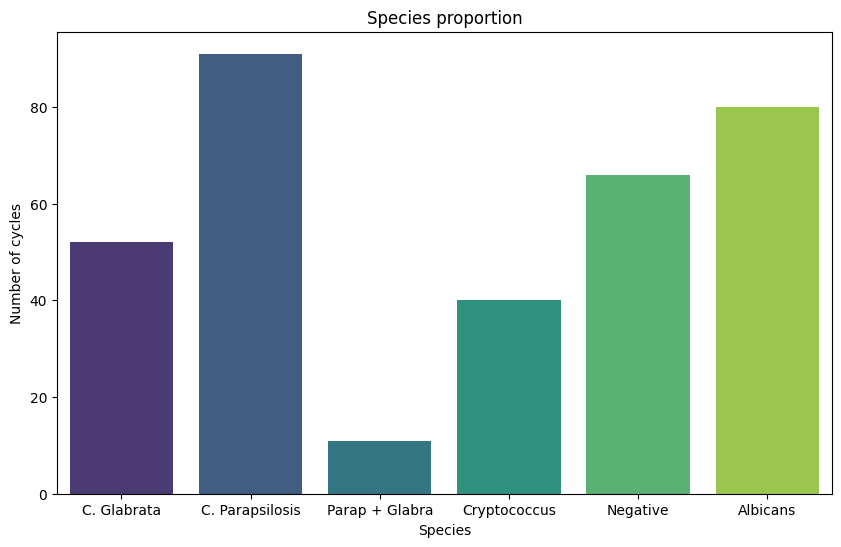

In [ ]:
plot_class_counts(newDF)

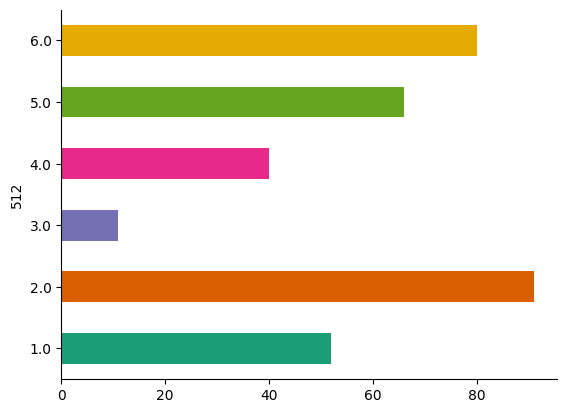

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
newDF.groupby('512').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **All data join**

In [ ]:
newDF.describe()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,...,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,1469.000000,969.357647,1369.770588,580.289118,1469.764706,969.350000,1372.010882,580.467059,1469.167647,969.053235,...,579.276176,1472.891176,971.641176,1387.047059,579.370588,1473.052941,971.587647,1388.450000,579.521471,3.638235
std,104.430751,76.378461,230.715160,50.282711,104.709194,76.411699,233.057331,50.395596,105.841194,76.486652,...,48.054167,103.707681,76.937820,181.849262,48.141661,103.746160,76.964691,181.696091,48.165982,1.869254
min,1247.000000,811.500000,561.300000,462.500000,1247.000000,810.900000,560.900000,463.100000,1246.000000,811.700000,...,468.500000,1248.000000,810.900000,1046.000000,465.100000,1247.000000,811.700000,1045.000000,465.100000,1.000000
25%,1369.750000,893.900000,1272.000000,534.550000,1369.000000,893.600000,1273.000000,534.600000,1369.000000,893.200000,...,534.400000,1370.000000,894.650000,1287.000000,534.000000,1370.000000,894.650000,1287.750000,534.000000,2.000000
50%,1500.000000,1001.500000,1333.000000,588.800000,1500.500000,1001.000000,1335.000000,588.900000,1499.000000,999.700000,...,589.600000,1511.500000,1006.500000,1350.500000,589.400000,1511.500000,1006.000000,1351.500000,590.100000,4.000000
75%,1559.000000,1035.000000,1460.250000,622.400000,1558.250000,1034.500000,1460.750000,622.650000,1561.000000,1034.250000,...,621.600000,1562.000000,1036.250000,1458.250000,621.700000,1562.000000,1037.000000,1459.250000,621.800000,5.000000
max,1635.000000,1089.000000,2147.000000,679.800000,1636.000000,1089.000000,2147.000000,681.600000,1638.000000,1088.000000,...,663.300000,1671.000000,1090.000000,2145.000000,663.300000,1671.000000,1089.000000,2146.000000,663.900000,6.000000


# **OverSample**

In [ ]:
def doRamdomOverSample(newDF):
    from imblearn.over_sampling import RandomOverSampler
    from collections import Counter
    # Aplicar RandomOverSampler
    y = newDF[str(len(newDF.columns)-1)]
    X = newDF.drop(columns=[str(len(newDF.columns)-1)])
    y
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    print(f"Distribuição original das classes: {Counter(y)}")
    print(f"Distribuição após oversampling: {Counter(y_resampled)}")

    df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
    return df_resampled

In [ ]:
df_resampled = doRamdomOverSample(newDF)
df_resampled = shuffle(df_resampled)


Distribuição original das classes: Counter({2.0: 91, 6.0: 80, 5.0: 66, 1.0: 52, 4.0: 40, 3.0: 11})
Distribuição após oversampling: Counter({5.0: 91, 6.0: 91, 1.0: 91, 2.0: 91, 4.0: 91, 3.0: 91})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


<ipython-input-16-d1c18f14ab5f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Specie', y='Quantity', data=class_counts, palette='viridis')
<ipython-input-16-d1c18f14ab5f>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels([class_names[item.get_text()] for item in barplot.get_xticklabels()])


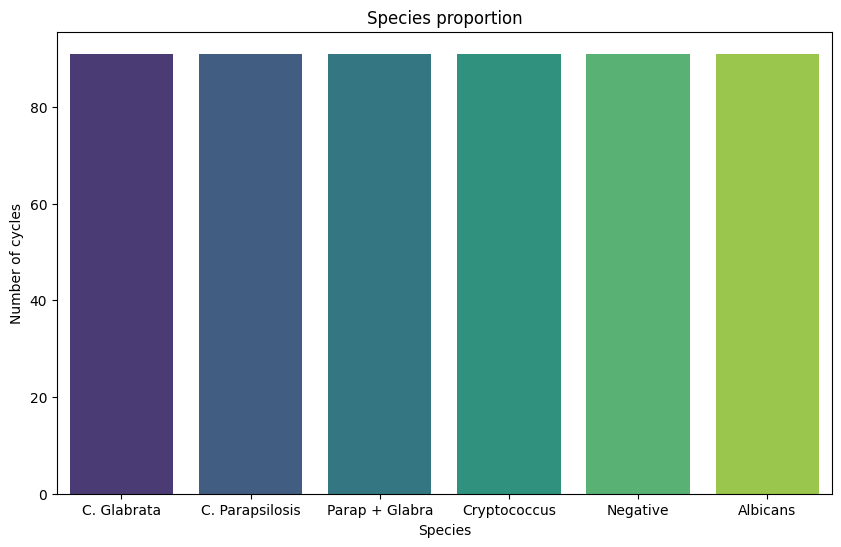

In [ ]:
plot_class_counts(df_resampled)

In [ ]:
df_resampled

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
105,1515.0,1009.0,1440.0,595.6,1515.0,1008.0,1442.0,596.0,1515.0,1009.0,...,602.2,1554.0,1011.0,1743.0,602.2,1554.0,1012.0,1745.0,602.4,2.0
207,1562.0,1066.0,1304.0,625.6,1562.0,1066.0,1307.0,625.6,1563.0,1067.0,...,624.6,1563.0,1064.0,1302.0,625.4,1563.0,1064.0,1305.0,625.8,4.0
504,1479.0,1012.0,704.6,628.2,1479.0,1012.0,704.4,627.6,1479.0,1012.0,...,621.6,1559.0,1065.0,1265.0,622.0,1559.0,1065.0,1265.0,622.0,4.0
194,1350.0,874.7,1273.0,529.3,1350.0,875.6,1275.0,529.5,1350.0,875.2,...,523.7,1338.0,864.1,1268.0,523.3,1338.0,863.9,1269.0,523.5,6.0
278,1255.0,813.1,1096.0,470.7,1255.0,812.9,1100.0,470.5,1255.0,812.7,...,472.3,1257.0,815.9,1088.0,472.5,1257.0,815.5,1091.0,472.9,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,1551.0,1024.0,1337.0,626.0,1552.0,1024.0,1339.0,626.0,1552.0,1024.0,...,625.4,1554.0,1026.0,1321.0,625.6,1554.0,1025.0,1324.0,625.4,5.0
25,1562.0,1022.0,1461.0,631.2,1562.0,1023.0,1463.0,631.4,1561.0,1022.0,...,640.3,1576.0,1037.0,1432.0,640.1,1580.0,1037.0,1434.0,641.1,2.0
425,1573.0,1072.0,1357.0,617.5,1569.0,1069.0,1356.0,617.5,1573.0,1072.0,...,624.2,1575.0,1072.0,1359.0,624.0,1584.0,1070.0,1360.0,623.8,3.0
465,1544.0,1060.0,1051.0,626.4,1544.0,1059.0,1051.0,626.2,1543.0,1060.0,...,640.7,1593.0,1084.0,1393.0,642.7,1593.0,1084.0,1393.0,642.7,4.0


# **Save output files**

In [ ]:
def save_output_files(newDF, fileName):
    newDF.to_csv(str(fileName)+'.csv', index = False)
    train_pct_index = int(0.6 * len(newDF))
    val_pct_index = int(0.8 * len(newDF))
    AllCandida_TRAIN, AllCandida_VAL, AllCandida_TEST  = newDF[:train_pct_index], newDF[train_pct_index:val_pct_index],newDF[val_pct_index:]
    # AllCandida_TRAIN, AllCandida_TEST  = newDF[:train_pct_index], newDF[train_pct_index:]
    print(f"Size of AllCandida_TRAIN: {len(AllCandida_TRAIN)}")
    print(f"Size of AllCandida_VAL: {len(AllCandida_VAL)}")
    print(f"Size of AllCandida_TEST: {len(AllCandida_TEST)}")
    AllCandida_TRAIN.to_csv(str(fileName)+'_TRAIN.csv', index = False)
    AllCandida_VAL.to_csv(str(fileName)+'_VAL.csv', index = False)
    AllCandida_TEST.to_csv(str(fileName)+'_TEST.csv', index = False)

save_output_files(newDF, "AllCandidasBload")
save_output_files(df_resampled, "AllCandidasBloadOversample")

Size of AllCandida_TRAIN: 204
Size of AllCandida_VAL: 68
Size of AllCandida_TEST: 68
Size of AllCandida_TRAIN: 327
Size of AllCandida_VAL: 109
Size of AllCandida_TEST: 110


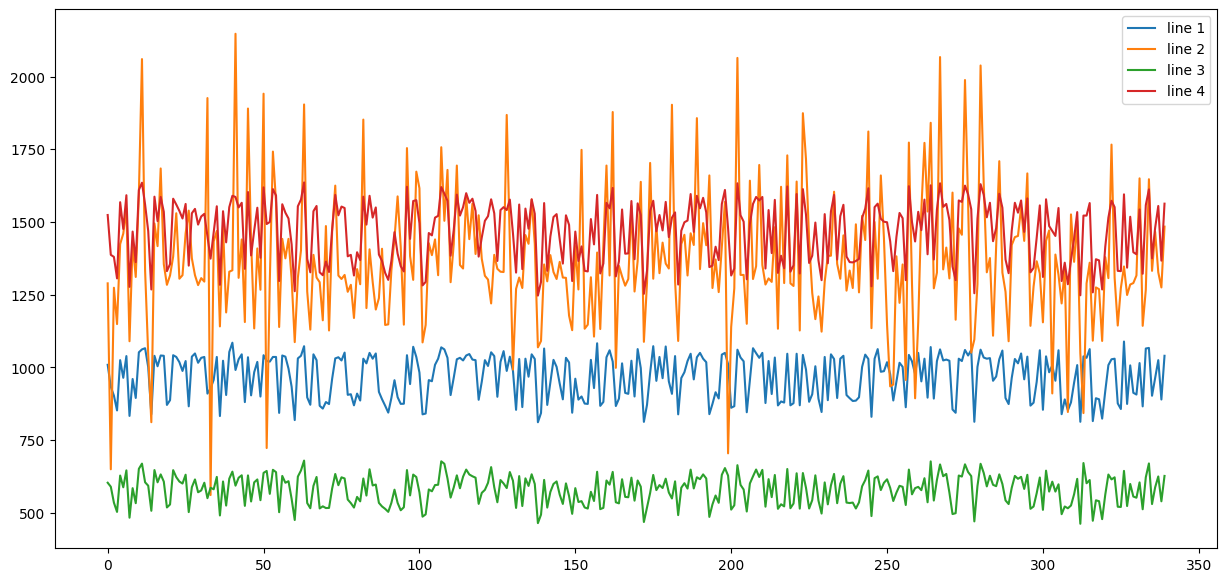

In [ ]:
import matplotlib.pyplot as plt
s = newDF[2]
s = s.reset_index(drop=True)
fig = plt.figure(figsize=[15,7])

# plot lines
plt.plot(range(0,len(newDF[1][:512])), newDF[1][:512], label = "line 1")
plt.plot(range(0,len(newDF[2][:512])), newDF[2][:512], label = "line 2")
plt.plot(range(0,len(newDF[3][:512])), newDF[3][:512], label = "line 3")
plt.plot(range(0,len(newDF[4][:512])), newDF[4][:512], label = "line 4")

plt.legend()
plt.show()

In [ ]:
#
def run_random_forest(newDF):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import h5py
    # Separando os dados em features (X) e target (y)
    X = newDF.drop(columns=[f'{len(newDF.columns)-1}'])
    y = newDF[f'{len(newDF.columns)-1}']

    # Dividindo os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Criando o modelo RandomForest
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Treinando o modelo
    model.fit(X_train, y_train)
    # Salvar o modelo em HDF5
    with h5py.File('random_forest_model.hdf5', 'w') as f:
        # Salvar parâmetros do modelo
        f.create_dataset('n_estimators', data=np.array(model.n_estimators))
        f.create_dataset('max_depth', data=np.array(model.max_depth))
        f.create_dataset('n_classes', data=np.array(model.n_classes_))

        # Salvar as árvores
        for i, tree in enumerate(model.estimators_):
            f.create_dataset(f'tree_{i}', data=tree.tree_.__getstate__())
    # Fazendo previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliando a acurácia do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Acurácia do modelo:", accuracy)
    return X_train, X_test, y_train, y_test, y_pred

# X_train0, X_test0, y_train0, y_test0, y_pred0 = run_random_forest(newDF)
# X_train, X_test, y_train, y_test, y_pred = run_random_forest(df_resampled)

In [ ]:
def run_decision_tree_classifier(newDF):
    from sklearn.ensemble import IsolationForest
    from sklearn.svm import OneClassSVM
    from sklearn.neighbors import LocalOutlierFactor
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns


    # Treine um modelo explicável (como Decision Tree) nos dados sem outliers
    model_explicavel = DecisionTreeClassifier()
    model_explicavel.fit(X_train, y_train)

    # Use o modelo explicável para fazer previsões e explicar as decisões
    y_pred_explicavel = model_explicavel.predict(X_test)

    # Avaliar a acurácia do modelo explicável
    accuracy_explicavel = accuracy_score(y_test, y_pred_explicavel)
    print("Acurácia do modelo explicável:", accuracy_explicavel)

    # Calcular as métricas para o modelo explicável
    precision_explicavel = precision_score(y_test, y_pred_explicavel, average='macro')
    recall_explicavel = recall_score(y_test, y_pred_explicavel, average='macro')
    f1_explicavel = f1_score(y_test, y_pred_explicavel, average='macro')

    # Imprimir as métricas para o modelo explicável
    print("Métricas para o modelo explicável:")
    print("Acurácia:", accuracy_explicavel)
    print("Precisão:", precision_explicavel)
    print("Recall:", recall_explicavel)
    print("F1-Score:", f1_explicavel)

    # Criar a matriz de confusão para o modelo explicável
    cm_explicavel = confusion_matrix(y_test, y_pred_explicavel)

    # Plotar o mapa de confusão para o modelo explicável
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_explicavel, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Previsões (Decision Tree)')
    plt.ylabel('Valores Reais')
    plt.title('Mapa de Confusão (Decision Tree)')
    plt.show()

    # Visualizar a árvore de decisão
    from sklearn.tree import plot_tree

    plt.figure(figsize=(20, 10))
    plot_tree(model_explicavel, filled=True, feature_names=X_train.columns, class_names=['Glabrata', 'Parapsilosis', 'Glabra_parap','Cryptococcus','Negative','Albicans'])
    plt.show()

# run_decision_tree_classifier(newDF)
# run_decision_tree_classifier(df_resampled)

In [ ]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.8/36.8 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.5/141.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 83.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
from numpy.random import default_rng
from sktime.datatypes._panel._check import is_nested_dataframe
from sktime.datatypes._panel._convert import (
    from_2d_array_to_nested,
    from_nested_to_2d_array,
)
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train))
X_test_s = pd.DataFrame(scaler.transform(X_test))


X_test = from_2d_array_to_nested(X_test_s)
X_train = from_2d_array_to_nested(X_train_s)
X_train

# **Exemplo**

In [ ]:
glabrata_1 = load_data("src/Glabrata​_01​_17_08_2024.csv", 1)
cycles_gla1, max_length, species_value  = extract_cycles(glabrata_1, "#### New CycleReads  ####")

print("Número de ciclos encontrados:", len(cycles_gla1))
print("Tamanho do maior ciclo:", max_length)
print("species_value:", species_value)

In [ ]:
plot_cycles(cycles_gla1)

In [ ]:
# Exemplo de uso:
limit_length = 128  # Defina o tamanho limite desejado
equalized_cycles = equalize_dataframes(cycles_gla1, limit_length)

# Verifique o tamanho dos dataframes equalizados
for i, cycle in enumerate(equalized_cycles):
  print(f"Tamanho do ciclo {i+1} equalizado: {len(cycle)}")

new_df_glabrata = process_cycles(cycles_gla1,species_value )
new_df_glabrata

In [ ]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 333.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


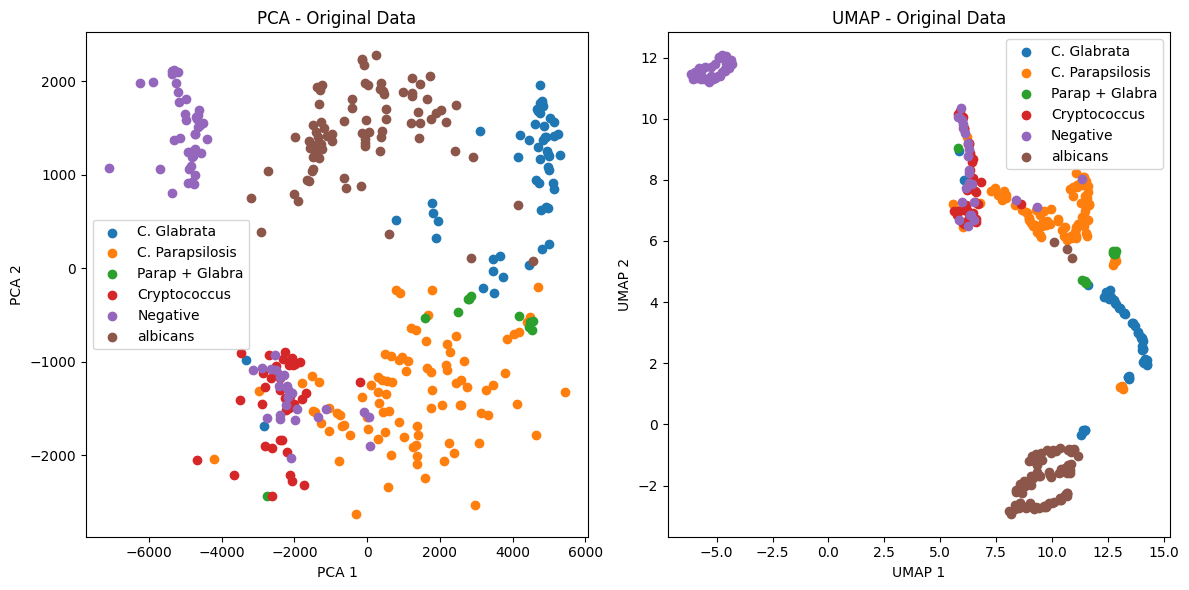

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


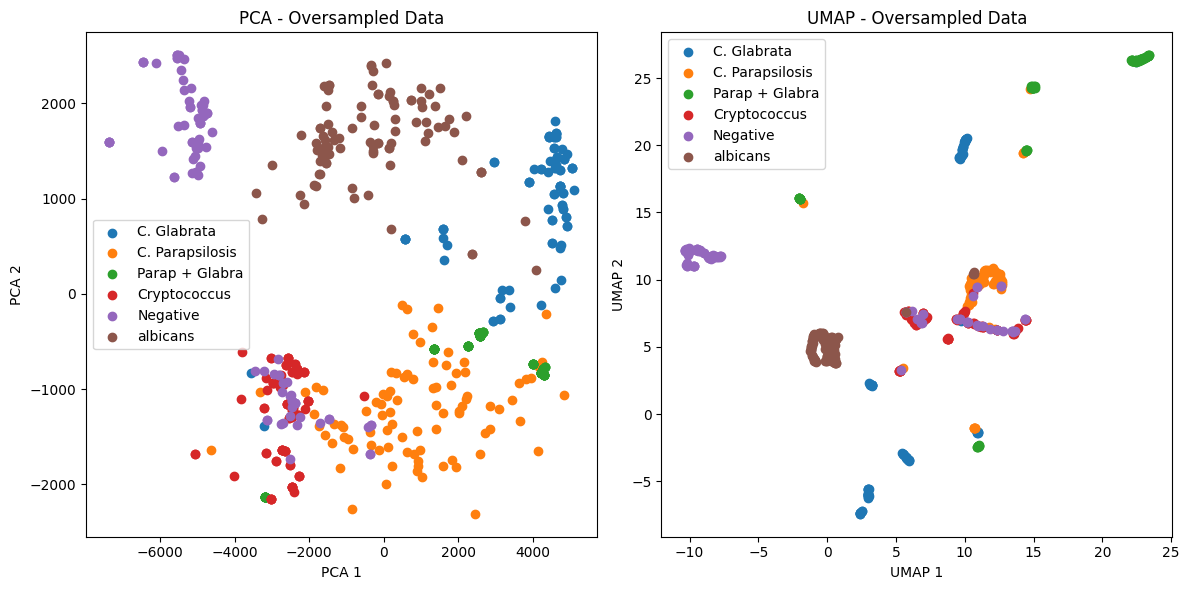

In [ ]:
# 

import umap.umap_ as umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

class_names = {'1.0': 'C. Glabrata', '2.0': 'C. Parapsilosis',
              '3.0': 'Parap + Glabra', '4.0': 'Cryptococcus', '5.0': 'Negative','6.0':'albicans'}

def plot_pca_umap(df, title):
    X = df.drop(columns=[f'{len(df.columns)-1}'])
    y = df[f'{len(df.columns)-1}']

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    for class_label in class_names.keys():
        plt.scatter(X_pca[y == float(class_label), 0], X_pca[y == float(class_label), 1], label=class_names[class_label])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(f'PCA - {title}')
    plt.legend()

    # UMAP
    reducer = umap.UMAP(n_components=2, random_state=42)
    X_umap = reducer.fit_transform(X)

    plt.subplot(1, 2, 2)
    for class_label in class_names.keys():
        plt.scatter(X_umap[y == float(class_label), 0], X_umap[y == float(class_label), 1], label=class_names[class_label])
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.title(f'UMAP - {title}')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Aplicando PCA e UMAP para newDF
plot_pca_umap(newDF, 'Original Data')

# Aplicando PCA e UMAP para df_resampled
plot_pca_umap(df_resampled, 'Oversampled Data')
